# Conceptos de estadística avanzada

Presenta: Juliho David Castillo Colmenares

¡Bienvenido a la actividad práctica del módulo! 

**Antes de empezar**

En este archivo pondrás en práctica algunos de los conceptos aprendidos de estadística avanzada, como pruebas de normalidad, algunas medidas estadísticas importantes como varianza y desviación estándar, así como el concepto de linealidad aplicado a un ejemplo sobre como predecir el precio de venta de casas de acuerdo a sus diferentes características. La descripción de cada característica la podrás encontrar en el archivo de data_description.txt

**Paso a paso:**

- Descarga el archivo House Pricing.csv. En la sección de Anexos.
- Verifica por medio de pruebas analíticas y visuales como es la distribución de las diferentes variables númericas que se encuentran en el dataset como “Salesprice”, “GrLivArea”, “'2ndFlrSF”. Calculando algunas métricas importantes como la media, la desviación estándar y sus cuártiles.
<!-- ![img](https://static.lms.ebac.mx/content-files/03329cf7-ad71-4d68-b258-f443a233445a/original.png) -->
- Calcula las correlaciones entre estás variables y visualiza el resultado en un heatmap, ¿Qué variables correlacionan más con el Precio de Venta?
- Configura un modelo de regresión con todas las variables numéricas por medio de la función OLS de la librería *sm*
- Imprime el reporte de regresión y revisa que variables son estadísticamente significativas para nuestro modelo.
- Por último por medio de la libería *variance_inflation_factor* revisa que variables presentan multicolinealidad
- Con todo el análisis anterior construye el modelo de regresión final excluyendo aquellas variables que consideres necesarias y mide el nivel de precisión del modelo por medio del error cuadratico medio y la R cuadrada. ¿Qué tan preciso fue tu modelo?

**Archivo final**

**¿Cómo presentar su entrega?**

Un Jupyter Notebook (archivo de extensión .ipynb), archivo PDF y capturas de pantalla en el espacio de respuesta que muestren tanto el código desarrollado como la solución al problema planteado, incluyendo los comentarios que sean pertinentes a las preguntas que se plantean. Entregas sin estos elementos no serán calificadas.

**Tiempo estimado de resolución:** 90 minutos

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score



In [40]:
TARGET = 'SalePrice'

In [41]:

df = pd.read_csv('House Pricing.csv') 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
numerical_df = df.select_dtypes(include='number').drop(columns='Id')
numerical_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [44]:
# Calcular métricas estadísticas
metrics = numerical_df.describe().T
metrics['variance'] = numerical_df.var()
metrics['skewness'] = numerical_df.skew()
metrics['kurtosis'] = numerical_df.kurtosis()

In [45]:
# Mostrar las métricas
print(metrics)

                count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712  

In [46]:
# Separar la variable objetivo (price) de los predictores
X = numerical_df.drop(columns=[TARGET])
y = numerical_df[TARGET]

In [47]:
X.loc[:, X.isna().any()].isna().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [48]:
X.fillna(X.median(), inplace=True)

In [49]:
X.loc[:, X.isna().any()].isna().mean()

Series([], dtype: float64)

In [50]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Usar RFE para seleccionar las mejores variables predictoras
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

# Obtener las columnas seleccionadas
selected_columns = X.columns[selector.support_]

print("Mejores variables predictoras para el precio:")
print(selected_columns)

Mejores variables predictoras para el precio:
Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'Fireplaces', 'GarageCars'], dtype='object')


In [51]:
X = X[selected_columns]
X.head()

,OverallQual,BsmtFullBath,FullBath,Fireplaces,GarageCars
0,7,1,2,0,2
1,6,0,2,1,2
2,7,1,2,1,2
3,7,1,1,1,3
4,8,1,2,1,3


In [52]:
extended_X = pd.concat([X, y], axis=1)
extended_X.head()

,OverallQual,BsmtFullBath,FullBath,Fireplaces,GarageCars,SalePrice
0,7,1,2,0,2,208500
1,6,0,2,1,2,181500
2,7,1,2,1,2,223500
3,7,1,1,1,3,140000
4,8,1,2,1,3,250000


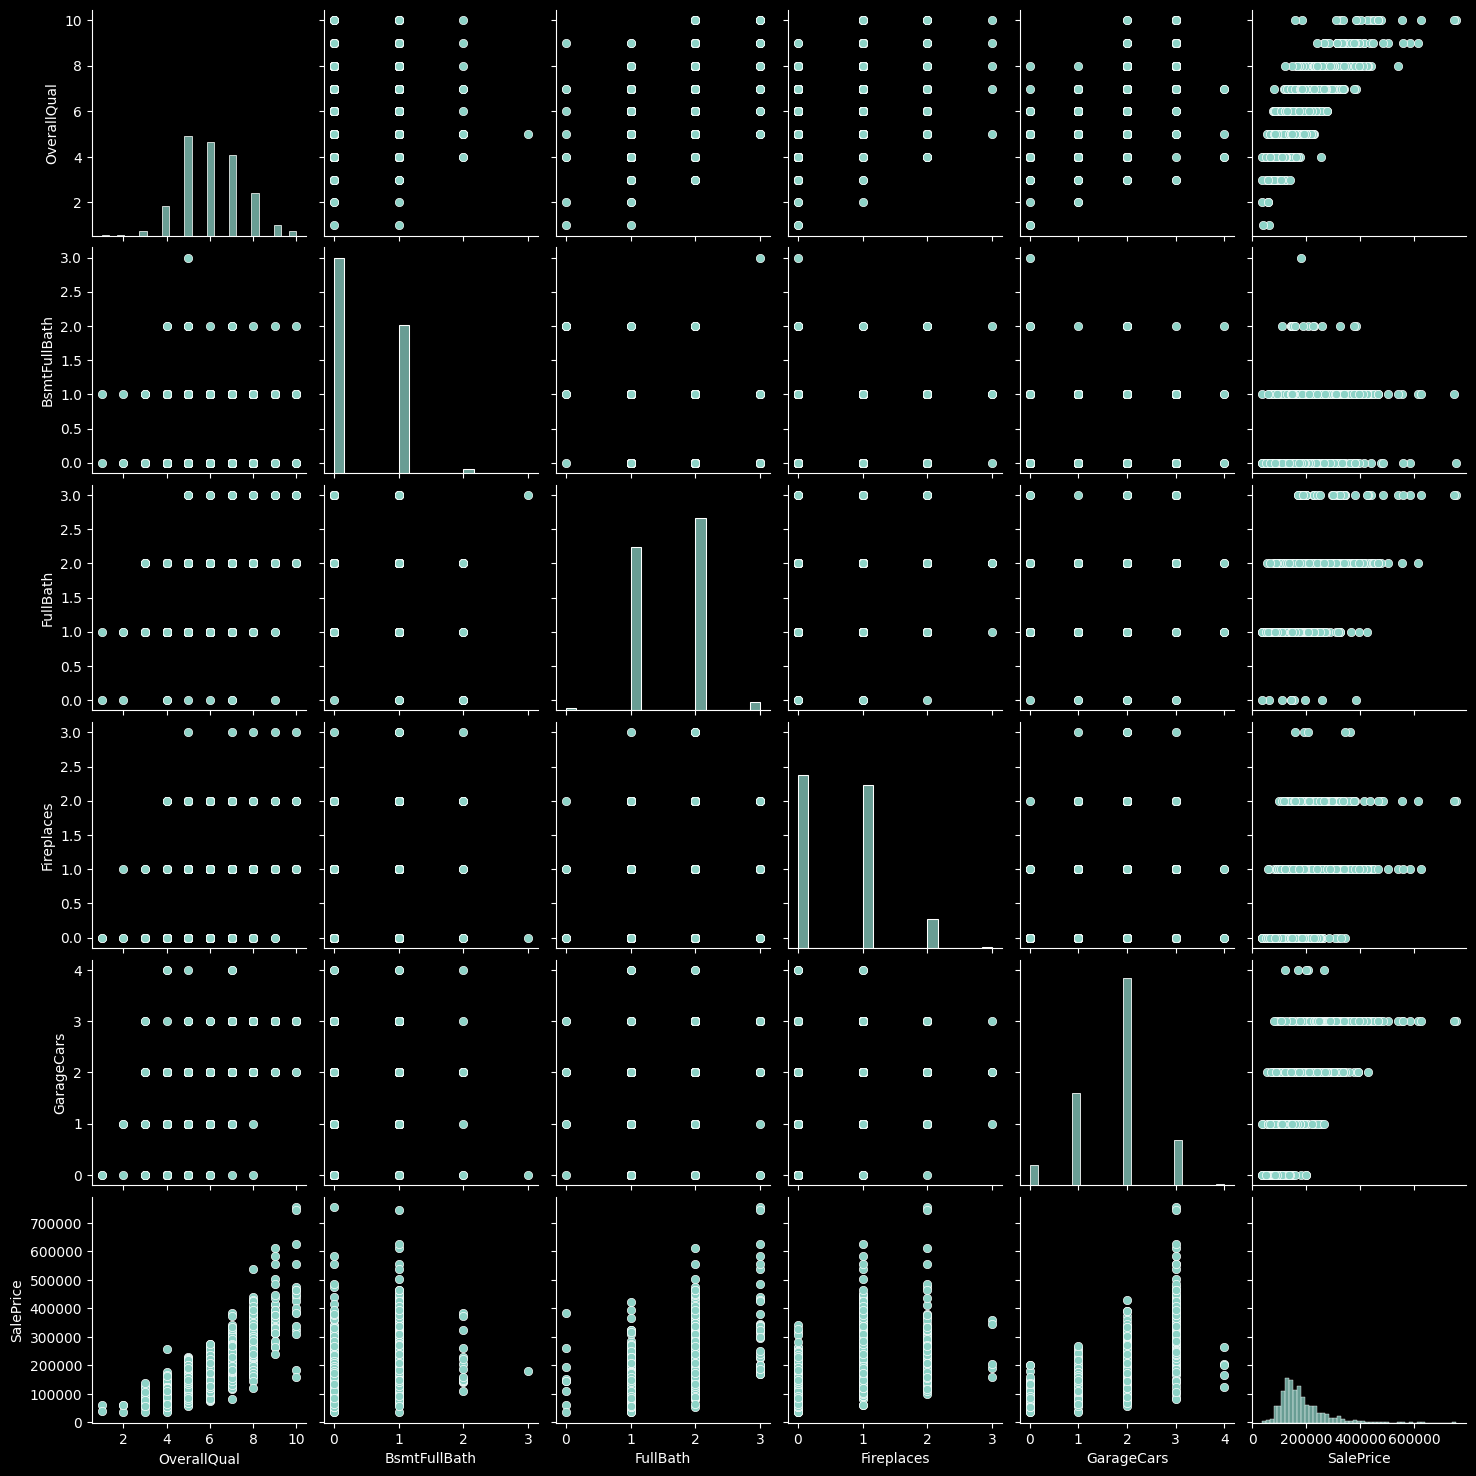

In [53]:
# Visualizar la distribución de las variables numéricas usando pairplot
sns.pairplot(extended_X)
plt.show()

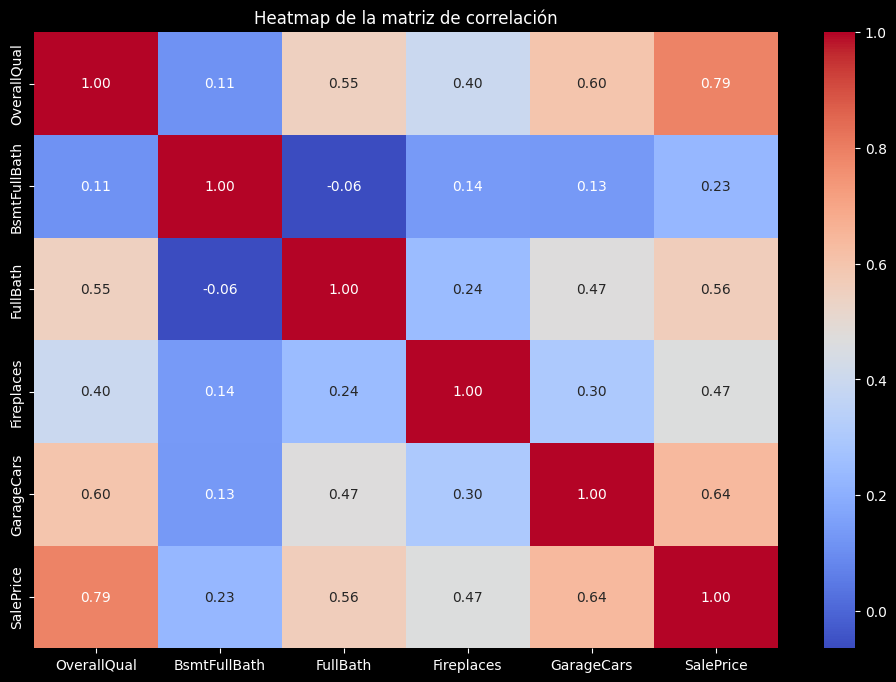

Variables que más correlacionan con SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GarageCars      0.640409
FullBath        0.560664
Fireplaces      0.466929
BsmtFullBath    0.227122
Name: SalePrice, dtype: float64


In [54]:
# Calcular la matriz de correlación
correlation_matrix = extended_X.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la matriz de correlación')
plt.show()

# Identificar las variables que tienen la mayor correlación con SalePrice
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("Variables que más correlacionan con SalePrice:")
print(correlation_with_target)

In [55]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     745.0
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:06:02   Log-Likelihood:                -17617.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1454   BIC:                         3.528e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.117e+04   5172.036    -17.627   


Para determinar la significancia estadística de cada variable, se observó el valor p (P>|t|). Una variable se considera estadísticamente significativa si su valor p es menor que 0.05.

Todas las variables en el modelo (`const`, `OverallQual`, `BsmtFullBath`, `FullBath`, `Fireplaces`, `GarageCars`) son estadísticamente significativas, ya que todos los valores p son menores a 0.05.

In [56]:
# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar las variables con alta multicolinealidad (VIF > 10)
print(vif_data[vif_data["VIF"] > 10])

  Variable        VIF
0    const  21.966881


In [57]:
# Identificar y excluir las variables con alta multicolinealidad (VIF > 10)
high_vif_vars = vif_data[vif_data["VIF"] > 10]["Variable"].tolist()
X_final = X.drop(columns=high_vif_vars)

# Construir el modelo de regresión final
model_final = sm.OLS(y, X_final).fit()

# Imprimir el resumen del modelo
print(model_final.summary())


                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              4995.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):                        0.00
Time:                        16:06:02   Log-Likelihood:                         -17758.
No. Observations:                1460   AIC:                                  3.553e+04
Df Residuals:                    1455   BIC:                                  3.555e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [58]:

# Predicciones del modelo
y_pred = model_final.predict(X_final)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")


Error Cuadrático Medio (MSE): 2148962435.637613


In [59]:

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

Coeficiente de determinación (R²): 0.6592620148026425


### Análisis de Precisión del Modelo

El coeficiente de determinación (R²) obtenido es 0.6592620148026425.

### Interpretación
- **R² = 0.659**: Esto indica que aproximadamente el 65.9% de la variabilidad en la variable dependiente (`SalePrice`) puede ser explicada por las variables independientes en el modelo.
- **Precisión Moderada**: Un R² de 0.659 sugiere que el modelo tiene una precisión moderada. No es extremadamente preciso, pero aún proporciona una buena cantidad de información sobre la relación entre las variables independientes y la variable dependiente.

### Conclusión
El modelo de regresión final tiene una precisión moderada, lo que significa que puede ser útil para hacer predicciones, pero hay espacio para mejorar. Podríamos considerar:
- Incluir más variables relevantes.
- Probar transformaciones de variables.
- Utilizar técnicas de selección de características.
- Probar otros tipos de modelos de regresión o técnicas de machine learning.

Esto ayudará a mejorar la precisión del modelo y obtener mejores predicciones.